In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import spacy
import scattertext as st
from IPython.display import display, Markdown
from scattertext import PhraseMachinePhrases, dense_rank, RankDifference, AssociationCompactor, produce_scattertext_explorer
from scattertext.CorpusFromPandas import CorpusFromPandas
from nltk.sentiment.util import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime

In [3]:
blm_df = pd.read_csv('blm_tweets_for_models.csv', index_col=0)
blm_df['date'] = pd.to_datetime(blm_df['date'], format='%Y-%m-%d', errors='coerce')
blm_df['nlikes'] = pd.to_numeric(blm_df['nlikes'], errors='coerce')
blm_df = blm_df.dropna()
blm_df.head()

,date,hashtags,nlikes,tweet,username,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,len,year,month,liked,vader_sent,textblob_sent,avg_sent
0,2020-06-24 16:59:09,['#blm'],20.0,"NO JUSTICE, NO PEACE #BLM",satanic_syd,NO JUSTICE NO PEACE BLM,"['no', 'justice', 'no', 'peace', 'blm', '']","['justice', 'peace', 'blm', '']","['justic', 'peac', 'blm', '']","['justice', 'peace', 'blm', '']",27,2020,6,popular,0.7845,0.000000,0.392250
1,2020-06-24 16:52:19,"['#poem', '#motivation', '#blm']",206.0,Funny thing\nAbout life is\nYou’ll always be t...,derickijohnson,Funny thing\nAbout life is\nYou’ll always be t...,"['funny', 'thing', 'about', 'life', 'is', 'you...","['funny', 'thing', 'life', 'always', 'one', 'e...","['funni', 'thing', 'life', 'alway', 'one', 'el...","['funny', 'thing', 'life', 'always', 'one', 'e...",264,2020,6,popular,0.9081,0.366667,0.637383
2,2020-06-24 16:47:56,['#blm'],23.0,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,AngelofLightLit,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,"['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'woman', 'protect', 'blac...",65,2020,6,popular,0.7783,-0.166667,0.305817
3,2020-06-24 16:46:02,['#blm'],147.0,My kid wrote #blm in chalk on my driveway and ...,Majhatesall,My kid wrote blm in chalk on my driveway and I...,"['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...",278,2020,6,popular,0.0000,0.100000,0.050000
4,2020-06-24 16:43:54,"['#auspol', '#blm', '#racismeantiblancs', '#vi...",24.0,"Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...",CaroDiRusso,Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...,"['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrat', 'repent', 'repeat', ...","['genuflect', 'prostrate', 'repent', 'repeat',...",96,2020,6,popular,0.0000,0.000000,0.000000


In [4]:
blm_df['date'] = blm_df['date'].dt.strftime('%Y-%m-%d')
blm_df.head()

,date,hashtags,nlikes,tweet,username,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,len,year,month,liked,vader_sent,textblob_sent,avg_sent
0,2020-06-24,['#blm'],20.0,"NO JUSTICE, NO PEACE #BLM",satanic_syd,NO JUSTICE NO PEACE BLM,"['no', 'justice', 'no', 'peace', 'blm', '']","['justice', 'peace', 'blm', '']","['justic', 'peac', 'blm', '']","['justice', 'peace', 'blm', '']",27,2020,6,popular,0.7845,0.000000,0.392250
1,2020-06-24,"['#poem', '#motivation', '#blm']",206.0,Funny thing\nAbout life is\nYou’ll always be t...,derickijohnson,Funny thing\nAbout life is\nYou’ll always be t...,"['funny', 'thing', 'about', 'life', 'is', 'you...","['funny', 'thing', 'life', 'always', 'one', 'e...","['funni', 'thing', 'life', 'alway', 'one', 'el...","['funny', 'thing', 'life', 'always', 'one', 'e...",264,2020,6,popular,0.9081,0.366667,0.637383
2,2020-06-24,['#blm'],23.0,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,AngelofLightLit,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,"['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'woman', 'protect', 'blac...",65,2020,6,popular,0.7783,-0.166667,0.305817
3,2020-06-24,['#blm'],147.0,My kid wrote #blm in chalk on my driveway and ...,Majhatesall,My kid wrote blm in chalk on my driveway and I...,"['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...",278,2020,6,popular,0.0000,0.100000,0.050000
4,2020-06-24,"['#auspol', '#blm', '#racismeantiblancs', '#vi...",24.0,"Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...",CaroDiRusso,Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...,"['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrat', 'repent', 'repeat', ...","['genuflect', 'prostrate', 'repent', 'repeat',...",96,2020,6,popular,0.0000,0.000000,0.000000


In [5]:
blm_df['date'] = pd.to_datetime(blm_df['date'], format='%Y-%m-%d', errors='coerce')
blm_df.dtypes

date                datetime64[ns]
hashtags                    object
nlikes                     float64
tweet                       object
username                    object
tweet_punct                 object
tweet_tokenized             object
tweet_nonstop               object
tweet_stemmed               object
tweet_lemmatized            object
len                          int64
year                         int64
month                        int64
liked                       object
vader_sent                 float64
textblob_sent              float64
avg_sent                   float64
dtype: object

In [6]:
dates = ['2013-07-13', '2014-08-09', '2016-07-06', '2020-05-25', '2020-02-23', '2015-07-10', '2020-03-13', '2014-11-22']
names = ['Trayvon Martin', 'Eric Garner', 'Philando Castille', 'George Floyd', 'Ahmaud Arbery', 'Sandra Bland', 'Breonna Taylor', 'Tamir Rice']

In [7]:
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

In [8]:
blm_df[blm_df['year'] == 2017]['hashtags'].value_counts()

['#blm']                                                                                                                                                                                                                                                                                          1797
['#blm', '#blacklivesmatter', '#blmnews']                                                                                                                                                                                                                                                         1604
['#blm', '#indivisible']                                                                                                                                                                                                                                                                           128
['#wildhorses', '#blm']                                                                                            

In [9]:
blm_df[blm_df['date'] == '2019-12-11']['tweet'].count()

74

In [10]:
blm_df[blm_df['date'] == "2019-12-26"]

,date,hashtags,nlikes,tweet,username,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,len,year,month,liked,vader_sent,textblob_sent,avg_sent
42754,2019-12-26,"['#voteblue', '#convict', '#remove', '#teapart...",0.0,Big reason 2 #VOTEBLUE 4 DECENCY Senate #CONVI...,DrLindaShelton,Big reason VOTEBLUE DECENCY Senate CONVICT...,"['big', 'reason', 'voteblue', 'decency', 'sena...","['big', 'reason', 'voteblue', 'decency', 'sena...","['big', 'reason', 'voteblu', 'decenc', 'senat'...","['big', 'reason', 'voteblue', 'decency', 'sena...",190,2019,12,not_popular,0.0000,0.000000,0.000000
42755,2019-12-26,"['#voteblue', '#convict', '#remove', '#teapart...",1.0,Disastrous deficits-highest ever #VOTEBLUE 4 D...,DrLindaShelton,Disastrous deficitshighest ever VOTEBLUE DEC...,"['disastrous', 'deficitshighest', 'ever', 'vot...","['disastrous', 'deficitshighest', 'ever', 'vot...","['disastr', 'deficitshighest', 'ever', 'votebl...","['disastrous', 'deficitshighest', 'ever', 'vot...",210,2019,12,not_popular,-0.5994,-0.233333,-0.416367
42756,2019-12-26,"['#voteblue', '#convict', '#remove', '#teapart...",1.0,Don't be gullible Read & look #VOTEBLUE 4 DECE...,DrLindaShelton,Dont be gullible Read look VOTEBLUE DECENCY...,"['dont', 'be', 'gullible', 'read', 'look', 'vo...","['dont', 'gullible', 'read', 'look', 'voteblue...","['dont', 'gullibl', 'read', 'look', 'voteblu',...","['dont', 'gullible', 'read', 'look', 'voteblue...",207,2019,12,not_popular,0.2755,0.000000,0.137750
42757,2019-12-26,"['#voteblue', '#convict', '#remove', '#teapart...",1.0,This is very bad-along with Russia announcing ...,DrLindaShelton,This is very badalong with Russia announcing s...,"['this', 'is', 'very', 'badalong', 'with', 'ru...","['badalong', 'russia', 'announcing', 'success'...","['badalong', 'russia', 'announc', 'success', '...","['badalong', 'russia', 'announcing', 'success'...",254,2019,12,not_popular,0.5719,0.075000,0.323450
42758,2019-12-26,"['#voteblue', '#convict', '#remove', '#teapart...",0.0,Details matter READ thread carefully #VOTEBLUE...,DrLindaShelton,Details matter READ thread carefully VOTEBLUE ...,"['details', 'matter', 'read', 'thread', 'caref...","['details', 'matter', 'read', 'thread', 'caref...","['detail', 'matter', 'read', 'thread', 'care',...","['detail', 'matter', 'read', 'thread', 'carefu...",214,2019,12,not_popular,0.1531,-0.033333,0.059883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42880,2019-12-26,"['#bds', '#blm']",0.0,Awe.....racist bigots are getting made bc we w...,jper1,Aweracist bigots are getting made bc we won’t ...,"['aweracist', 'bigots', 'are', 'getting', 'mad...","['aweracist', 'bigots', 'getting', 'made', 'bc...","['aweracist', 'bigot', 'get', 'made', 'bc', 'p...","['aweracist', 'bigot', 'getting', 'made', 'bc'...",118,2019,12,not_popular,-0.1027,0.500000,0.198650
42881,2019-12-26,"['#bds', '#blm']",0.0,Hmmm....this doesn’t sound like a racist bigot...,jper1,Hmmmthis doesn’t sound like a racist bigoted t...,"['hmmmthis', 'doesn', 't', 'sound', 'like', 'a...","['hmmmthis', 'sound', 'like', 'racist', 'bigot...","['hmmmthi', 'sound', 'like', 'racist', 'bigot'...","['hmmmthis', 'sound', 'like', 'racist', 'bigot...",124,2019,12,not_popular,-0.8720,0.400000,-0.236000
42882,2019-12-26,"['#palestinians', '#israeli', '#occupation', '...",0.0,Victims have a right AND expectation to defend...,jper1,Victims have a right AND expectation to defend...,"['victims', 'have', 'a', 'right', 'and', 'expe...","['victims', 'right', 'expectation', 'defend', ...","['victim', 'right', 'expect', 'defend', 'pales...","['victim', 'right', 'expectation', 'defend', '...",180,2019,12,not_popular,-0.8126,0.045238,-0.383681
42883,2019-12-26,"['#palestinians', '#bds', '#blm']",0.0,"Is Israeli Terrorism, Ethnic Cleansing and Apa...",jper1,Is Israeli Terrorism Ethnic Cleansing and Apar...,"['is', 'israeli', 'terrorism', 'ethnic', 'clea...","['israeli', 'terrorism', 'ethnic', 'cleansing'...","['isra', 'terror', 'ethnic

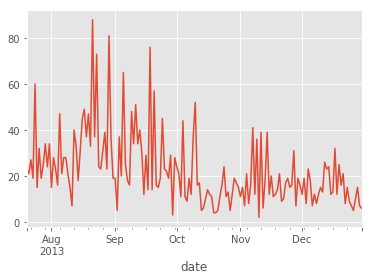

In [11]:

blm_df[blm_df['date'] < '2014-01-01'].groupby('date')['tweet'].count().plot()


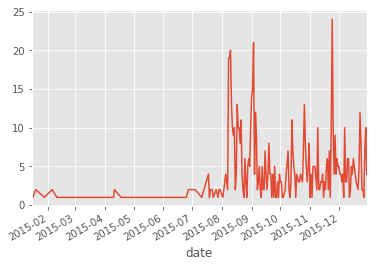

In [12]:
blm_df[blm_df['year'] == 2015].groupby('date')['tweet'].count().plot()

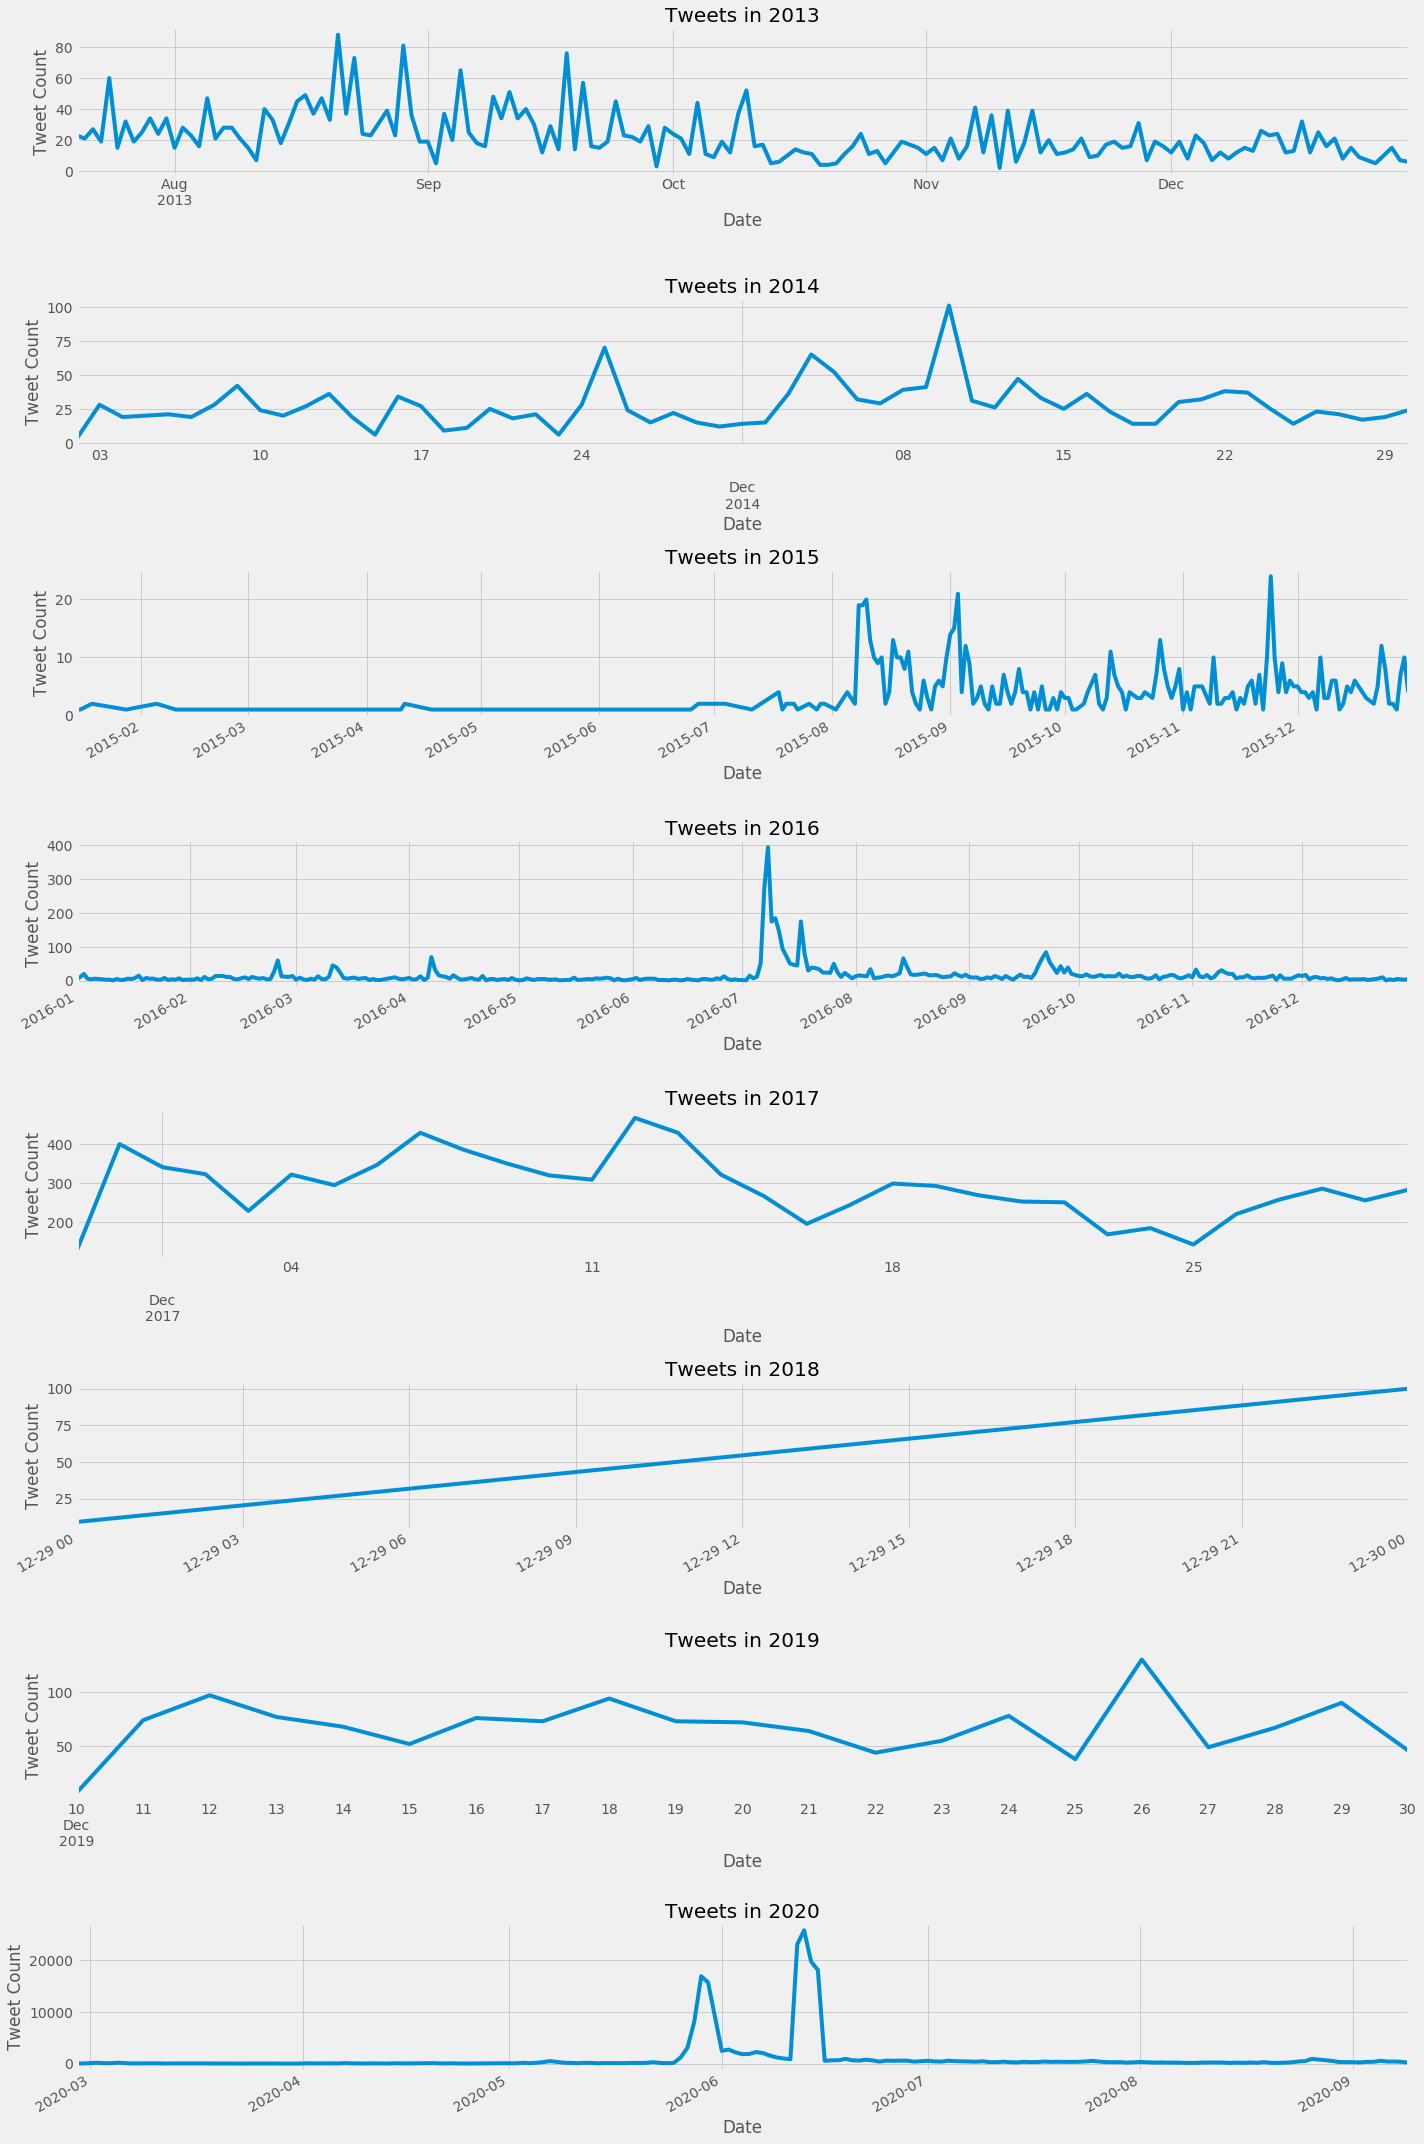

In [13]:
matplotlib.style.use('fivethirtyeight')
fig, (ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20) = plt.subplots(8, 1)
blm_df[blm_df['year'] == 2013].groupby('date')['tweet'].count().plot(ax=ax13)
blm_df[blm_df['year'] == 2014].groupby('date')['tweet'].count().plot(ax=ax14)
blm_df[blm_df['year'] == 2015].groupby('date')['tweet'].count().plot(ax=ax15)
blm_df[blm_df['year'] == 2016].groupby('date')['tweet'].count().plot(ax=ax16)
blm_df[blm_df['year'] == 2017].groupby('date')['tweet'].count().plot(ax=ax17)
blm_df[blm_df['year'] == 2018].groupby('date')['tweet'].count().plot(ax=ax18)
blm_df[blm_df['year'] == 2019].groupby('date')['tweet'].count().plot(ax=ax19)
blm_df[blm_df['year'] == 2020].groupby('date')['tweet'].count().plot(ax=ax20)
ax13.set_title('Tweets in 2013')
ax13.set_xlabel('Date')
ax13.set_ylabel('Tweet Count')

ax14.set_title('Tweets in 2014')
ax14.set_xlabel('Date')
ax14.set_ylabel('Tweet Count')

ax15.set_title('Tweets in 2015')
ax15.set_xlabel('Date')
ax15.set_ylabel('Tweet Count')

ax16.set_title('Tweets in 2016')
ax16.set_xlabel('Date')
ax16.set_ylabel('Tweet Count')

ax17.set_title('Tweets in 2017')
ax17.set_xlabel('Date')
ax17.set_ylabel('Tweet Count')

ax18.set_title('Tweets in 2018')
ax18.set_xlabel('Date')
ax18.set_ylabel('Tweet Count')

ax19.set_title('Tweets in 2019')
ax19.set_xlabel('Date')
ax19.set_ylabel('Tweet Count')

ax20.set_title('Tweets in 2020')
ax20.set_xlabel('Date')
ax20.set_ylabel('Tweet Count')

fig.set_figheight(30)
fig.set_figwidth(20)
fig.tight_layout()
plt.show()

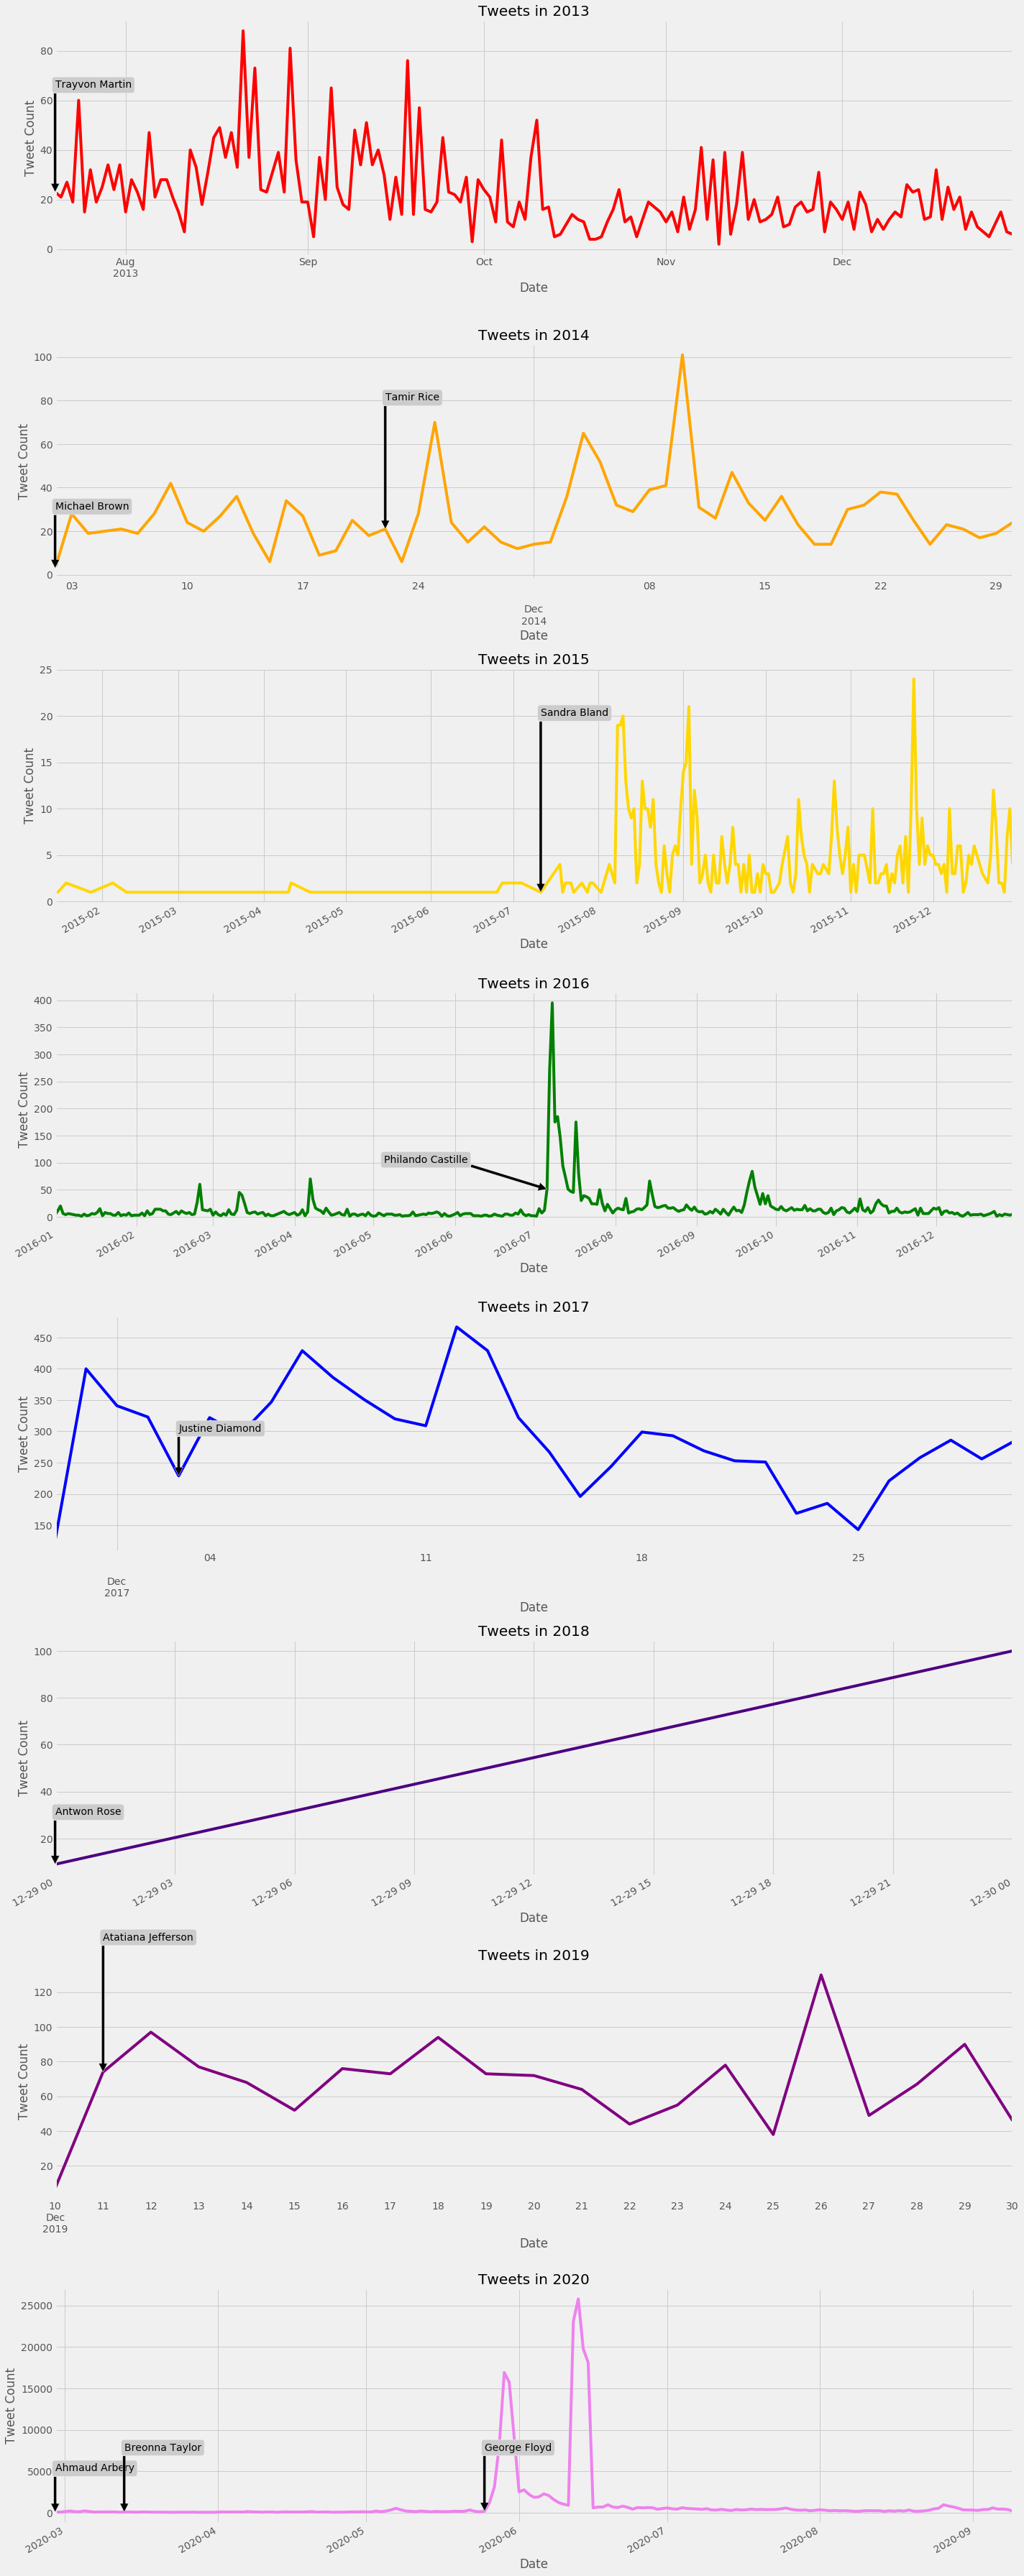

In [14]:
matplotlib.style.use('seaborn-colorblind')
bbox = dict(boxstyle="round", fc="0.8")
fig, (ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20) = plt.subplots(8, 1)
blm_df[blm_df['year'] == 2013].groupby('date')['tweet'].count().plot(ax=ax13, color='red')
blm_df[blm_df['year'] == 2014].groupby('date')['tweet'].count().plot(ax=ax14, color='orange')
blm_df[blm_df['year'] == 2015].groupby('date')['tweet'].count().plot(ax=ax15, color='gold')
blm_df[blm_df['year'] == 2016].groupby('date')['tweet'].count().plot(ax=ax16, color='green')
blm_df[blm_df['year'] == 2017].groupby('date')['tweet'].count().plot(ax=ax17, color='blue')
blm_df[blm_df['year'] == 2018].groupby('date')['tweet'].count().plot(ax=ax18, color='indigo')
blm_df[blm_df['year'] == 2019].groupby('date')['tweet'].count().plot(ax=ax19, color='purple')
blm_df[blm_df['year'] == 2020].groupby('date')['tweet'].count().plot(ax=ax20, color='violet')
ax13.set_title('Tweets in 2013')
ax13.set_xlabel('Date')
ax13.set_ylabel('Tweet Count')
ax13.annotate("Trayvon Martin", xy=('2013-07-20', 23), xytext=('2013-07-20', 65), arrowprops=dict(facecolor='black'), bbox=bbox)

ax14.set_title('Tweets in 2014')
ax14.set_xlabel('Date')
ax14.set_ylabel('Tweet Count')
ax14.annotate("Michael Brown", xy=('2014-11-02', 3), xytext=('2014-11-02', 30), arrowprops=dict(facecolor='black'), bbox=bbox)
ax14.annotate("Tamir Rice", xy=('2014-11-22', 21), xytext=('2014-11-22', 80), arrowprops=dict(facecolor='black'), bbox=bbox)

ax15.set_title('Tweets in 2015')
ax15.set_xlabel('Date')
ax15.set_ylabel('Tweet Count')
ax15.annotate("Sandra Bland", xy=('2015-07-11', 1), xytext=('2015-07-11', 20), arrowprops=dict(facecolor='black'),bbox=bbox)

ax16.set_title('Tweets in 2016')
ax16.set_xlabel('Date')
ax16.set_ylabel('Tweet Count')
ax16.annotate("Philando Castille", xy=('2016-07-06', 51), xytext=('2016-05-05', 100), arrowprops=dict(facecolor='black'), bbox=bbox)

ax17.set_title('Tweets in 2017')
ax17.set_xlabel('Date')
ax17.set_ylabel('Tweet Count')
ax17.annotate('Justine Diamond', xy=('2017-12-03', 229), xytext=('2017-12-03', 300), arrowprops=dict(facecolor='black'), bbox=bbox)

ax18.set_title('Tweets in 2018')
ax18.set_xlabel('Date')
ax18.set_ylabel('Tweet Count')
ax18.annotate('Antwon Rose', xy=('2018-12-29', 9 ), xytext=('2018-12-29', 30), arrowprops=dict(facecolor='black'), bbox=bbox)


ax19.set_title('Tweets in 2019')
ax19.set_xlabel('Date')
ax19.set_ylabel('Tweet Count')
ax19.annotate("Atatiana Jefferson", xy=('2019-12-11', 74), xytext=('2019-12-11', 150), arrowprops=dict(facecolor='black'), bbox=bbox)

ax20.set_title('Tweets in 2020')
ax20.set_xlabel('Date')
ax20.set_ylabel('Tweet Count')
ax20.annotate("Ahmaud Arbery", xy=('2020-02-28', 74), xytext=('2020-02-28', 5000), arrowprops=dict(facecolor='black'), bbox=bbox)
ax20.annotate("Breonna Taylor", xy=('2020-03-13', 78), xytext=('2020-03-13', 7500), arrowprops=dict(facecolor='black'), bbox=bbox)
ax20.annotate("George Floyd", xy=('2020-05-25', 178), xytext=('2020-05-25', 7500), arrowprops=dict(facecolor='black'), bbox=bbox)


fig.set_figheight(50)
fig.set_figwidth(20)
fig.tight_layout()
fig.savefig('Tweets over time.jpg', bbox_inches='tight', dpi=150)
plt.show()

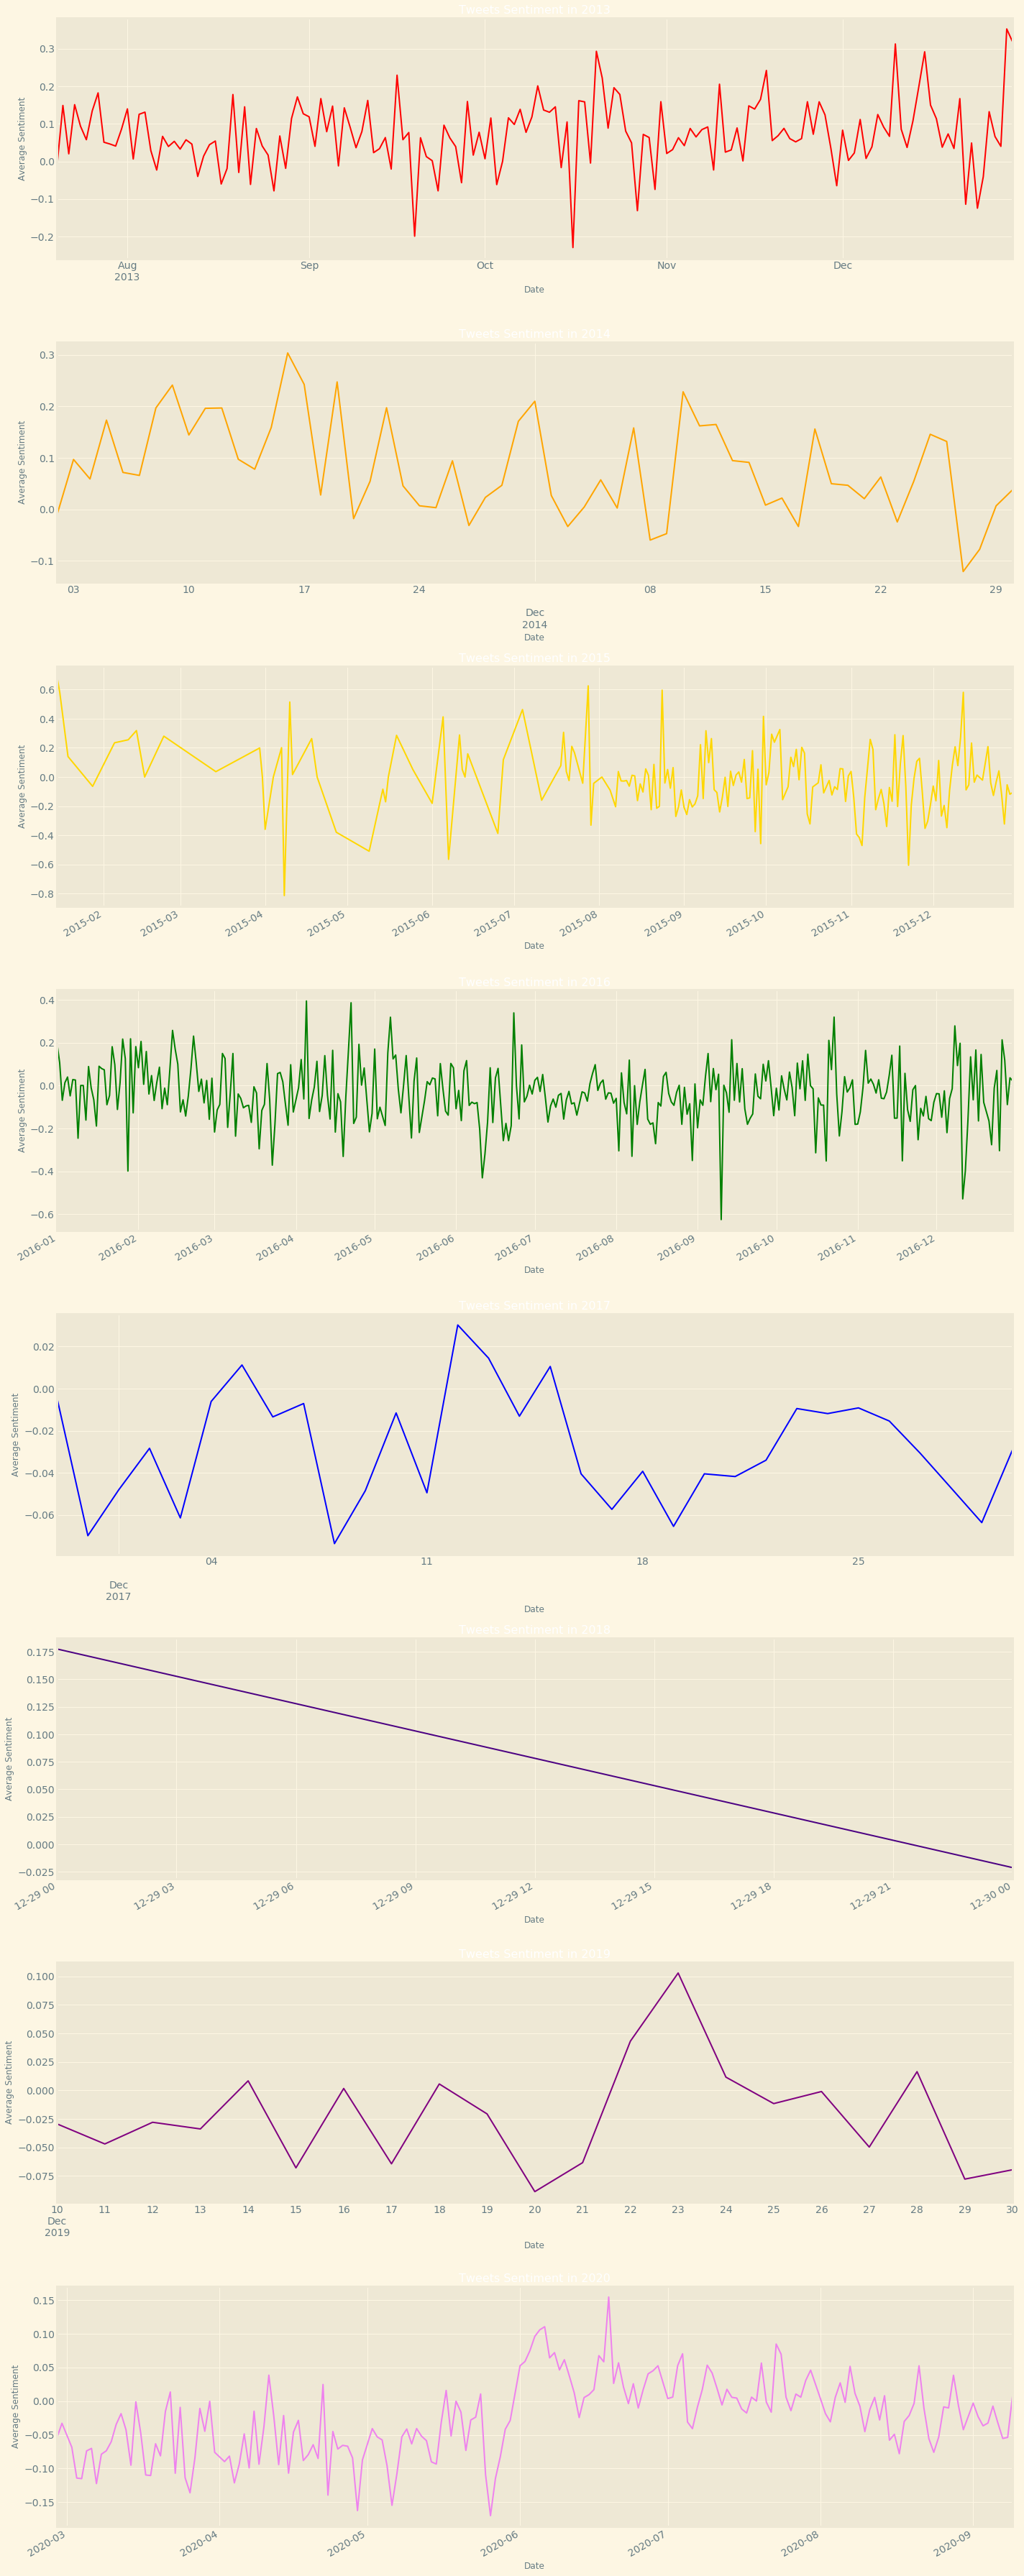

In [286]:
matplotlib.style.use('seaborn-colorblind')
bbox = dict(boxstyle="round", fc="0.8")
fig, (ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20) = plt.subplots(8, 1)
blm_df[blm_df['year'] == 2013].groupby('date')['avg_sent'].mean().plot(ax=ax13, color='red')
blm_df[blm_df['year'] == 2014].groupby('date')['avg_sent'].mean().plot(ax=ax14, color='orange')
blm_df[blm_df['year'] == 2015].groupby('date')['avg_sent'].mean().plot(ax=ax15, color='gold')
blm_df[blm_df['year'] == 2016].groupby('date')['avg_sent'].mean().plot(ax=ax16, color='green')
blm_df[blm_df['year'] == 2017].groupby('date')['avg_sent'].mean().plot(ax=ax17, color='blue')
blm_df[blm_df['year'] == 2018].groupby('date')['avg_sent'].mean().plot(ax=ax18, color='indigo')
blm_df[blm_df['year'] == 2019].groupby('date')['avg_sent'].mean().plot(ax=ax19, color='purple')
blm_df[blm_df['year'] == 2020].groupby('date')['avg_sent'].mean().plot(ax=ax20, color='violet')

ax13.set_title('Tweets Sentiment in 2013')
ax13.set_xlabel('Date')
ax13.set_ylabel('Average Sentiment')
#ax13.annotate("Trayvon Martin", xy=('2013-07-20', 23), xytext=('2013-07-20', 65), arrowprops=dict(facecolor='black'), bbox=bbox)

ax14.set_title('Tweets Sentiment in 2014')
ax14.set_xlabel('Date')
ax14.set_ylabel('Average Sentiment')
#ax14.annotate("Michael Brown", xy=('2014-11-02', 3), xytext=('2014-11-02', 30), arrowprops=dict(facecolor='black'), bbox=bbox)
#ax14.annotate("Tamir Rice", xy=('2014-11-22', 21), xytext=('2014-11-22', 80), arrowprops=dict(facecolor='black'), bbox=bbox)

ax15.set_title('Tweets Sentiment in 2015')
ax15.set_xlabel('Date')
ax15.set_ylabel('Average Sentiment')
#ax15.annotate("Sandra Bland", xy=('2015-07-11', 1), xytext=('2015-07-11', 20), arrowprops=dict(facecolor='black'),bbox=bbox)

ax16.set_title('Tweets Sentiment in 2016')
ax16.set_xlabel('Date')
ax16.set_ylabel('Average Sentiment')
#ax16.annotate("Philando Castille", xy=('2016-07-06', 51), xytext=('2016-05-05', 100), arrowprops=dict(facecolor='black'), bbox=bbox)

ax17.set_title('Tweets Sentiment in 2017')
ax17.set_xlabel('Date')
ax17.set_ylabel('Average Sentiment')
#ax17.annotate('Justine Diamond', xy=('2017-12-03', 229), xytext=('2017-12-03', 300), arrowprops=dict(facecolor='black'), bbox=bbox)

ax18.set_title('Tweets Sentiment in 2018')
ax18.set_xlabel('Date')
ax18.set_ylabel('Average Sentiment')
#ax18.annotate('Antwon Rose', xy=('2018-12-29', 9 ), xytext=('2018-12-29', 30), arrowprops=dict(facecolor='black'), bbox=bbox)


ax19.set_title('Tweets Sentiment in 2019')
ax19.set_xlabel('Date')
ax19.set_ylabel('Average Sentiment')
#ax19.annotate("Atatiana Jefferson", xy=('2019-12-11', 74), xytext=('2019-12-11', 150), arrowprops=dict(facecolor='black'), bbox=bbox)

ax20.set_title('Tweets Sentiment in 2020')
ax20.set_xlabel('Date')
ax20.set_ylabel('Average Sentiment')
#ax20.annotate("Ahmaud Arbery", xy=('2020-02-28', 74), xytext=('2020-02-28', 5000), arrowprops=dict(facecolor='black'), bbox=bbox)
#ax20.annotate("Breonna Taylor", xy=('2020-03-13', 78), xytext=('2020-03-13', 7500), arrowprops=dict(facecolor='black'), bbox=bbox)
#ax20.annotate("George Floyd", xy=('2020-05-25', 178), xytext=('2020-05-25', 7500), arrowprops=dict(facecolor='black'), bbox=bbox)


fig.set_figheight(50)
fig.set_figwidth(20)
fig.tight_layout()
plt.show()

In [ ]:
#blm_df['username'].value_counts()

In [ ]:
#nlp = spacy.load('en_core_web_md')

In [ ]:
#corpus = CorpusFromPandas(blm_df, category_col='liked', text_col='tweet_lemmatized', feats_from_spacy_doc=PhraseMachinePhrases(), nlp=nlp).build()

In [ ]:
#html = produce_scattertext_explorer(corpus, 
                                    category='popular', 
                                    category_name='popular', 
                                    not_category_name='not_popular', 
                                    minimum_term_frequency=0, 
                                    pmi_threshold_coefficient=0,
                                   transform=st.dense_rank,
                                   metadata=corpus.blm_df()['username'],
                                   term_scorer=st.RankDifference(),
                                   width_in_pixels=1000)